In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy.ma as ma
import rioxarray as rxr
import rasterio
from rasterio.plot import plotting_extent
import geopandas as gpd
import rasterstats as rs #extract the value
import earthpy as et
import earthpy.plot as ep
from glob import glob
import os

In [14]:
fordri_dir = "R:/UnitedStates/ForDRI_project-NEW/New_Model_2022/ForDRI/ForDRI/"
fordri_flist = glob(fordri_dir+"*.tif")
fordri_flist.sort()

## Extract ForDRI values at tree-ring sites in the US

In [40]:
# western US
west_tr_shp_dir = "R:/UnitedStates/ForDRI_project-NEW/shapefile/tree_ring_sites_7_years.shp"
west_tr_shp = gpd.read_file(west_tr_shp_dir)
west_tr_shp = west_tr_shp[['Collection','Northernmo', 'Westernmos']] # latitude and longitude
west_tr_shp.index = range(len(west_tr_shp))
west_tr_coords = [(x,y) for x, y in zip(west_tr_shp.Westernmos,west_tr_shp.Northernmo)]  # longitude and latitude

In [15]:
# eastern US
east_tr_shp_dir = "R:/UnitedStates/ForDRI_project-NEW/shapefile/Tree_site_info_overlapped_7yrs_easternUS.shp"
east_tr_shp = gpd.read_file(east_tr_shp_dir)
east_tr_shp = east_tr_shp.drop_duplicates() # drop diplicates
# east_tr_shp = east_tr_shp.loc[east_tr_shp['Collection']!='AR078',:]
east_tr_shp = east_tr_shp[['Collection','Northernmo', 'Westernmos']]
east_tr_shp.index = range(len(east_tr_shp))
east_tr_coords = [(x,y) for x, y in zip(east_tr_shp.Westernmos,east_tr_shp.Northernmo)]

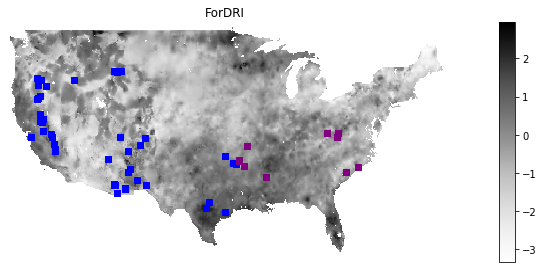

In [37]:
# display the tree sites based on a fordri layer
fordri = rxr.open_rasterio(fordri_flist[0], masked=True).squeeze()
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(fordri,
              extent=plotting_extent(fordri,
                                     fordri.rio.transform()),  # Set spatial extent
              cmap='Greys',
              title="ForDRI",
              scale=False,
              ax=ax)

west_tr_shp.plot(ax=ax,marker='s',markersize=45,color='blue')
east_tr_shp.plot(ax=ax,marker='s',markersize=45,color='purple')
ax.set_axis_off()
plt.show()

In [16]:
# extracting ForDRI at the tree ring sites
for fordri in fordri_flist:
    fname = os.path.basename(fordri)[-10:-4]
    with rasterio.open(fordri) as src:
        #west_tr_shp[fname] = [x[0] for x in src.sample(west_tr_coords)]
        east_tr_shp[fname] = [x[0] for x in src.sample(east_tr_coords)]

In [17]:
#west_tr_shp.to_csv("R:/UnitedStates/ForDRI_project-NEW/NEW_Evaluation_2022/New_Results/tree_ring_sites_fordri_westernUS.csv", index=None)
east_tr_shp.to_csv("R:/UnitedStates/ForDRI_project-NEW/NEW_Evaluation_2022/New_Results/tree_ring_sites_fordri_easternUS.csv", index=None)


## Extract ForDRI values at Bowen Ratio (AmeriFlux) sites in the US

In [3]:
west_br_dir ="/work/tadesse/beichen/Work/ForestDri/Raw_Data/shapefile/bowen_ratio_sites.shp"
west_br_shp = gpd.read_file(west_br_dir)
west_br_shp = west_br_shp[['Site','Lat','Long']]
west_br_shp.index = range(len(west_br_shp))
west_br_coords = [(x,y) for x, y in zip(west_br_shp.Long,west_br_shp.Lat)]

In [4]:
east_br_dir = "/work/tadesse/beichen/Work/ForestDri/Ameriflux/shapefile/AmeriFlux_Site_Info_EasternUS.shp"
east_br_shp = gpd.read_file(east_br_dir)
east_br_shp = east_br_shp[['Site_Id', 'Latitude__','Longitude']]
east_br_shp.index = range(len(east_br_shp))
east_br_shp.columns = ['Site','Lat','Long']
east_br_coords = [(x,y) for x, y in zip(east_br_shp.Long,east_br_shp.Lat)]

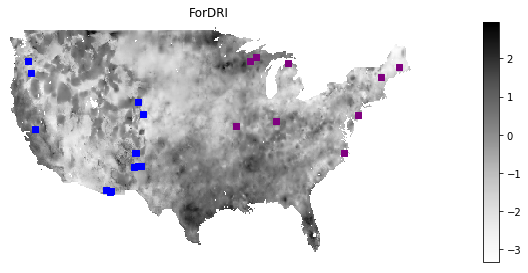

In [55]:
# display the AmeriFlux sites based on a fordri layer
fordri = rxr.open_rasterio(fordri_flist[0], masked=True).squeeze()
fig, ax = plt.subplots(figsize=(10, 10))

# We plot with the zeros in the data so the CHM can be better represented visually
ep.plot_bands(fordri,
              extent=plotting_extent(fordri,
                                     fordri.rio.transform()),  # Set spatial extent
              cmap='Greys',
              title="ForDRI",
              scale=False,
              ax=ax)

west_br_shp.plot(ax=ax,marker='s',markersize=45,color='blue')
east_br_shp.plot(ax=ax,marker='s',markersize=45,color='purple')
ax.set_axis_off()
plt.show()

In [ ]:
# extracting ForDRI at the AmeriFlux sites
for fordri in fordri_flist:
    fname = os.path.basename(fordri)[-10:-4]
    with rasterio.open(fordri) as src:
        west_br_shp[fname] = [x[0] for x in src.sample(west_br_coords)]
        east_br_shp[fname] = [x[0] for x in src.sample(east_br_coords)]

In [38]:
west_br_shp.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ameriflux_sites_fordri_westernUS.csv", index=None)
east_br_shp.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/ameriflux_sites_fordri_easternUS.csv", index=None)

In [ ]:
stdBW_dir = "/work/tadesse/beichen/Work/ForestDri/Ameriflux/Bowen_Ratio/"
stdBW_list = glob.glob(stdBW_dir+"*_stdBW.csv")
stdBW_list.sort()
for stdBW in stdBW_list:
    fname = os.path.basename(stdBW)
    df = pd.read_csv(stdBW,index_col=0)
    start = df.index[0]
    end = df.index[-1]
    print(start,end)
    if start < 200301:
        start = 200301
    if end > 202052:
        end = 202052
    df = df.loc[200301:202052,:]
    df.to_csv("/work/tadesse/beichen/Work/ForestDri/NEW_Validation_2022/stdbw/"+fname)
    